In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Теория
Изменение давление от координаты и времени: $$ \Delta P(x, t) = P_0cos(\omega t\pm kx) $$.

$$ v_{зв} = \frac{\omega}{k} = \lambda f $$
$$ k = \frac{2\pi}{\lambda} $$
$$ \omega = 2 \pi f $$,

где $ \omega $ - круговая частота, $ k $ - волновое число, $ \lambda $ - длина волны, $ v_{зв} $ - скорость звука

скорость распространения продольных волн в безграничной однородной среде:
$$
v_{зв} = \sqrt{\frac{dP}{d\rho}}
$$

$P$(давление) зависит не только от плотности $ \rho $, но и от температуры $ T $, поэтому надо пояснить, в каком смысле берется производная $^{dP}/_{d\rho}$.
Колебания плотности и связанные с ними колебания температуры в звуковой волне происходят настолько быстро, а теплопроводности газов настолько малы, что для таких процессов теплообменом можно пренебречь, так что процесс распространения звука можно считать $\textit{адиабатическим}$. Следовательно, производную $^{dP}/_{d\rho}$ необходимо рассчитывать для адиабатического процесса.

## Теплоемкости

#### Рассматриваем ситуацию идеального газа
$$ \Big( \frac{\partial{U}}{\partial{V}} \Big)_{T} = 0.$$

$$
C_x = C_v + P\Big( \frac{\partial{V}}{\partial{T}} \Big)_{x}
$$

$$
C_p - C_v = R
$$

$$
\gamma = \frac{C_p}{C_v}
$$

## Формулы, используемые в лабораторной работе
$$
   v_{зв} = \sqrt{\gamma \frac{RT}{\mu}}
$$

$$
   \gamma = \frac{\mu}{RT}v^2_{зв}
$$

Если поймали резонанс, то уравнение стоячей звуковой волны:
$$
\Delta P(x,t) = 2P_0cos(\omega t)sin(kx).
$$

### Погрешности
$$\sigma_{v_{зв}} = \sqrt{\big(2L \sigma_k\big)^2 + \big(2k\sigma_L \big)^2} $$
$$\sigma_{\gamma}=\sqrt{\big(\frac{2\mu}{RT}v_{зв}\sigma_{v_{зв}}\big)^2 + \big( \frac{\mu}{\sqrt{2}RT}v^2_{зв}\sigma_T\big)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# TODO
# def draw_grid(xstep, ystep, ):
#     xstep = 0.05
#     ystep = 0.2
#     minor_xticks = np.arange(np.min(x) - xstep, np.max(x) + xstep, xstep / 10)
#     major_xticks = np.arange(np.min(x) - xstep, np.max(x) + xstep, xstep)
#     minor_yticks = np.arange(-0.6 - ystep, 0.8 + ystep, ystep / 10)
#     major_yticks = np.arange(-0.6 - ystep, 0.8 + ystep, ystep)

#     ax.set_xticks(major_xticks)
#     ax.set_xticks(minor_xticks, minor=True)
#     ax.set_yticks(major_yticks)
#     ax.set_yticks(minor_yticks, minor=True)

#     ax.grid(which='minor', alpha=0.4, ls=':')
#     ax.grid(which='major', alpha=0.6, ls=':')

def print_latex(text):
    plt.plot()
    plt.text(0.5, 0.5,'${}$'.format(text))
    plt.show()

In [4]:
L = 0.8 # +- 0.001 мм
mu = 0.029 # кг/моль
R = 8.31 # Дж / (моль * К)

def celsium2kelvin(t):
    return t + 273.15

def kelvin2celsium(t):
    return t - 273.15

c2k = np.vectorize(celsium2kelvin)
k2c = np.vectorize(kelvin2celsium)


In [5]:
harmonics_nums = np.array([1, 2, 3, 4, 5, 10])

temperatures = c2k([22.2, 30.2, 40.0, 50.0, 55.1])

resonance_freqs = np.array([[204, 447, 659, 872, 1090, 2170],
                           [202, 451, 669, 883, 1102, 2195],
                           [205, 459, 676, 897, 1118, 2231],
                           [210, 467, 686, 915, 1140, 2280],
                           [215, 470, 697, 930, 1144, 2285]])

In [6]:
def get_v_sound(T, resonance_freqs):
    k, b = np.polyfit(harmonics_nums, resonance_freqs, 1)
    
    return k * (2 * L)

def get_gamma(T, resonance_freqs):
    c = get_v_sound(T, resonance_freqs)
    
    return mu / (R * T) * c ** 2

# погрешности
sigma_L = 0.001 # м
sigma_T = 0.1 # К

# returns k and sigma_k
def get_k(T, resonance_freqs):
    x = harmonics_nums
    y = resonance_freqs
    n = len(x)
    k, b = np.polyfit(x, y, 1)
    return k, np.sqrt(np.fabs(((np.mean(y ** 2) - ((np.mean(y)) ** 2)) /
              ((np.mean(x ** 2) - ((np.mean(x)) ** 2)))) - (k ** 2))) / np.sqrt(n)

def get_v_sound_sigma(T, resonance_freqs):
    k, sigma_k = get_k(T, resonance_freqs)
    return np.sqrt((2 * L * sigma_k) ** 2 + (2 * k * sigma_L) ** 2)

def get_gamma_sigma(T, resonance_freqs):
    sigma_c = get_v_sound_sigma(T, resonance_freqs)
    c = get_v_sound(T, resonance_freqs)
    
    return np.sqrt((2 * mu / (R * T) * c * sigma_c) ** 2 + (mu / (np.sqrt(2) * R * T) * c ** 2 * sigma_T) ** 2)

In [7]:
measures = []
for t, resonances in zip(temperatures, resonance_freqs):
    for num, resonance_freq in zip(harmonics_nums, resonances):
        measures.append([kelvin2celsium(t), num, resonance_freq])

measures = pd.DataFrame(data=measures, 
                        columns=[r"Температура, $^{{\circ}}C$", 
                                 u"№ гармоники",
                                 u"частота, Гц"])
measures

,"Температура, $^{{\circ}}C$",№ гармоники,"частота, Гц"
0,22.2,1,204
1,22.2,2,447
2,22.2,3,659
3,22.2,4,872
4,22.2,5,1090
5,22.2,10,2170
6,30.2,1,202
7,30.2,2,451
8,30.2,3,669
9,30.2,4,883


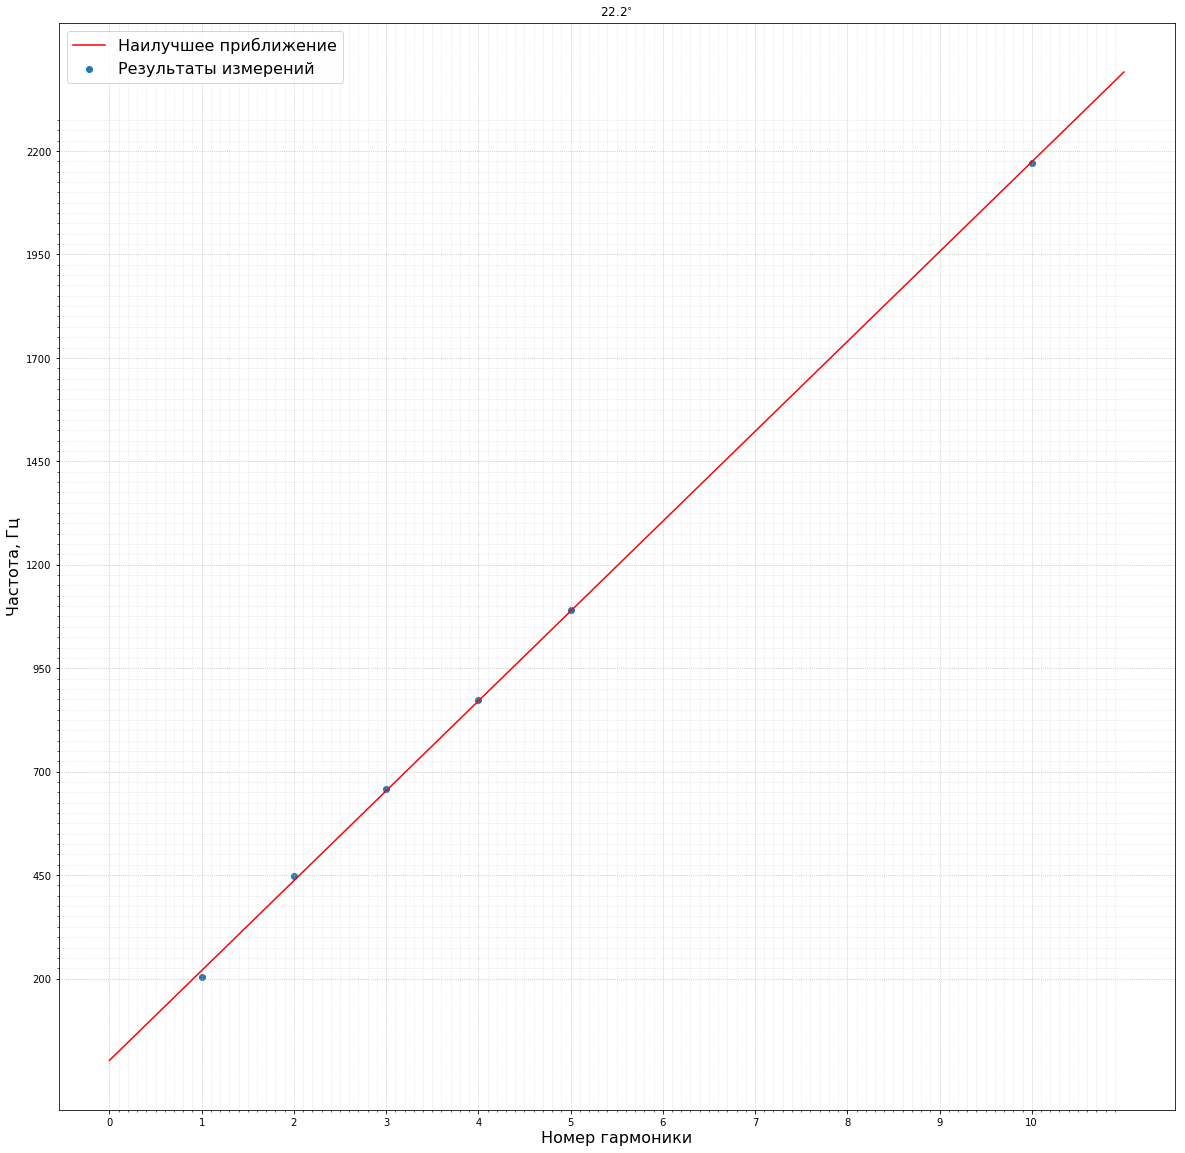

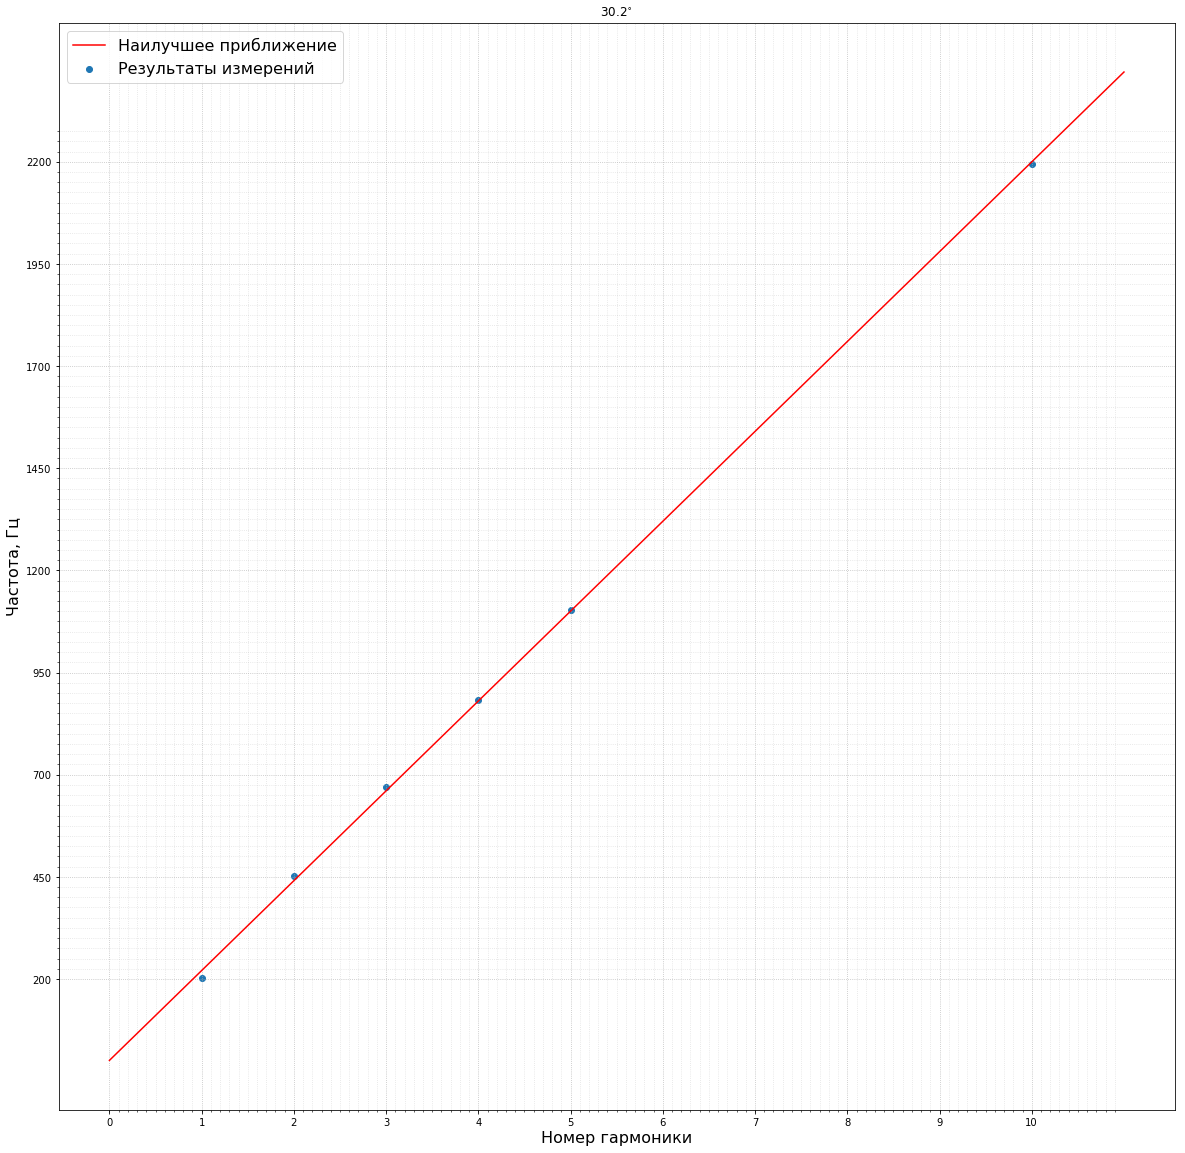

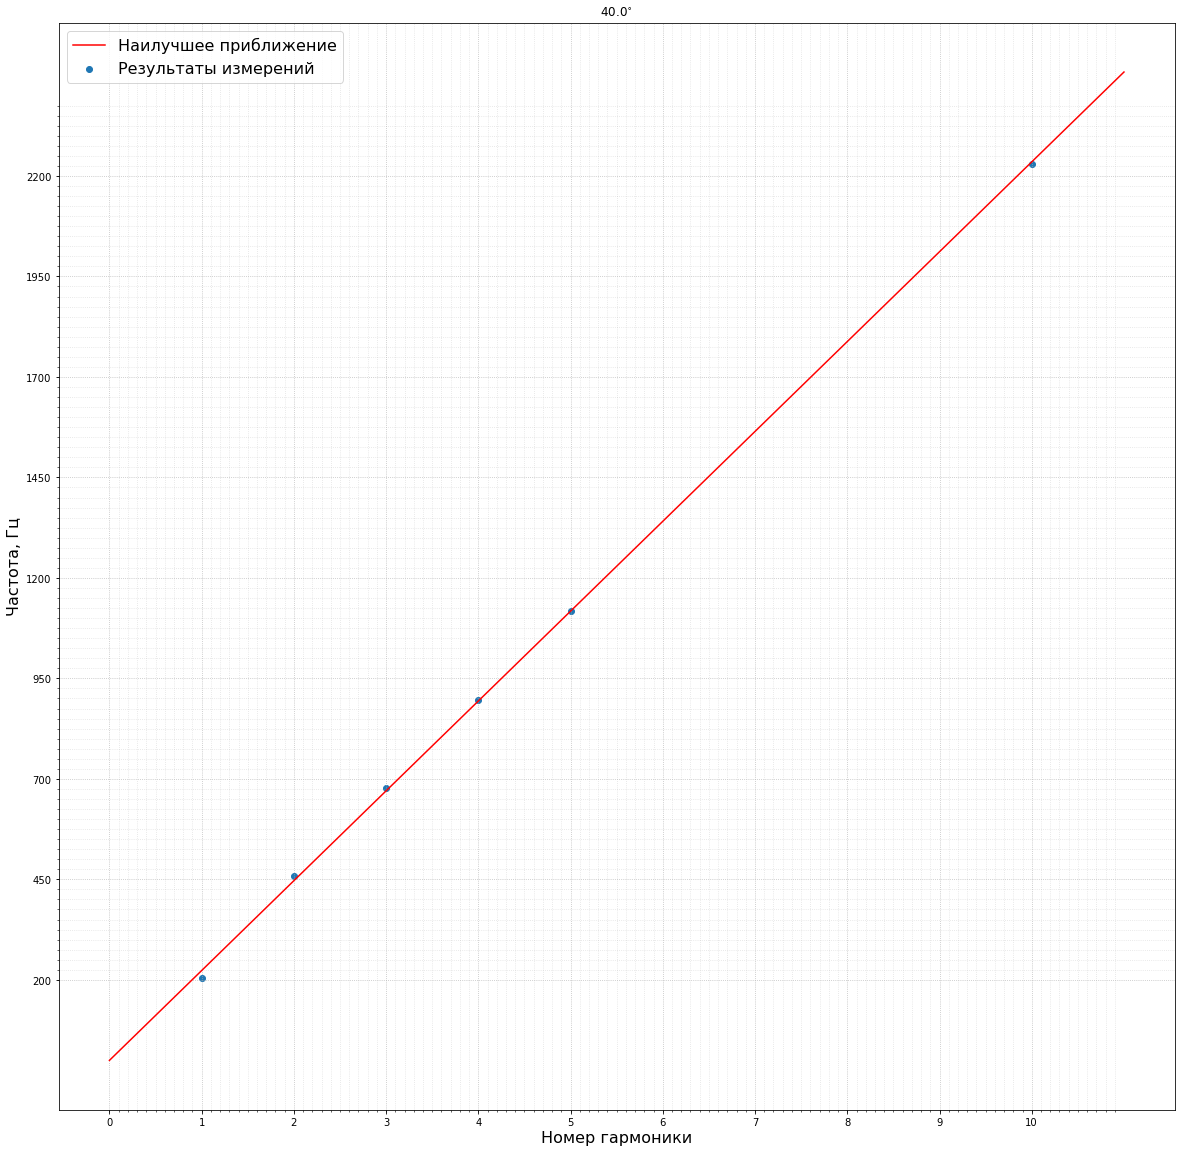

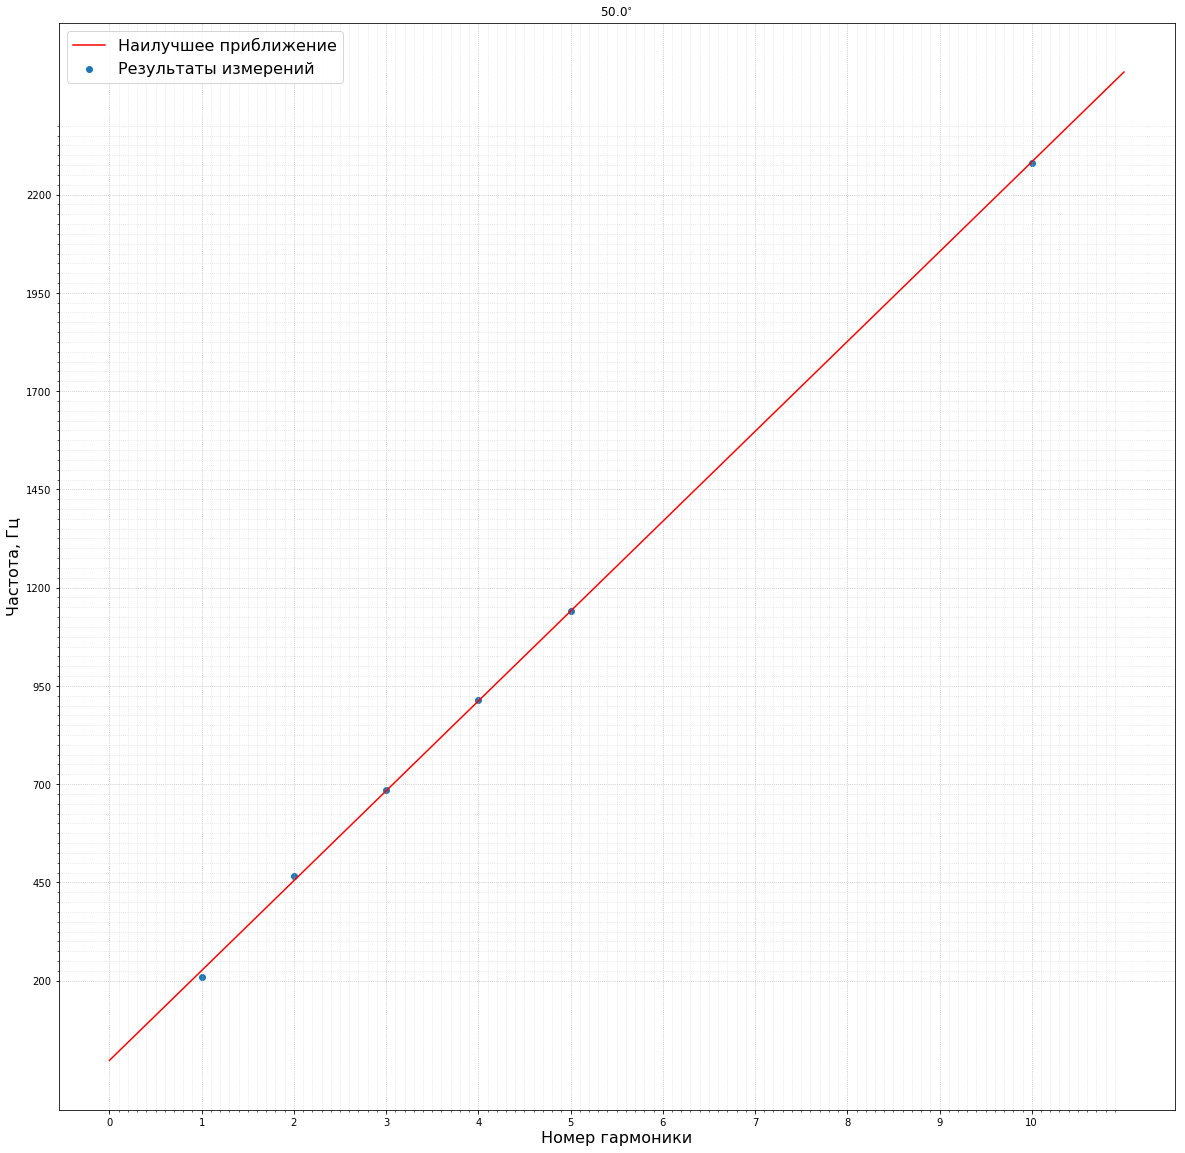

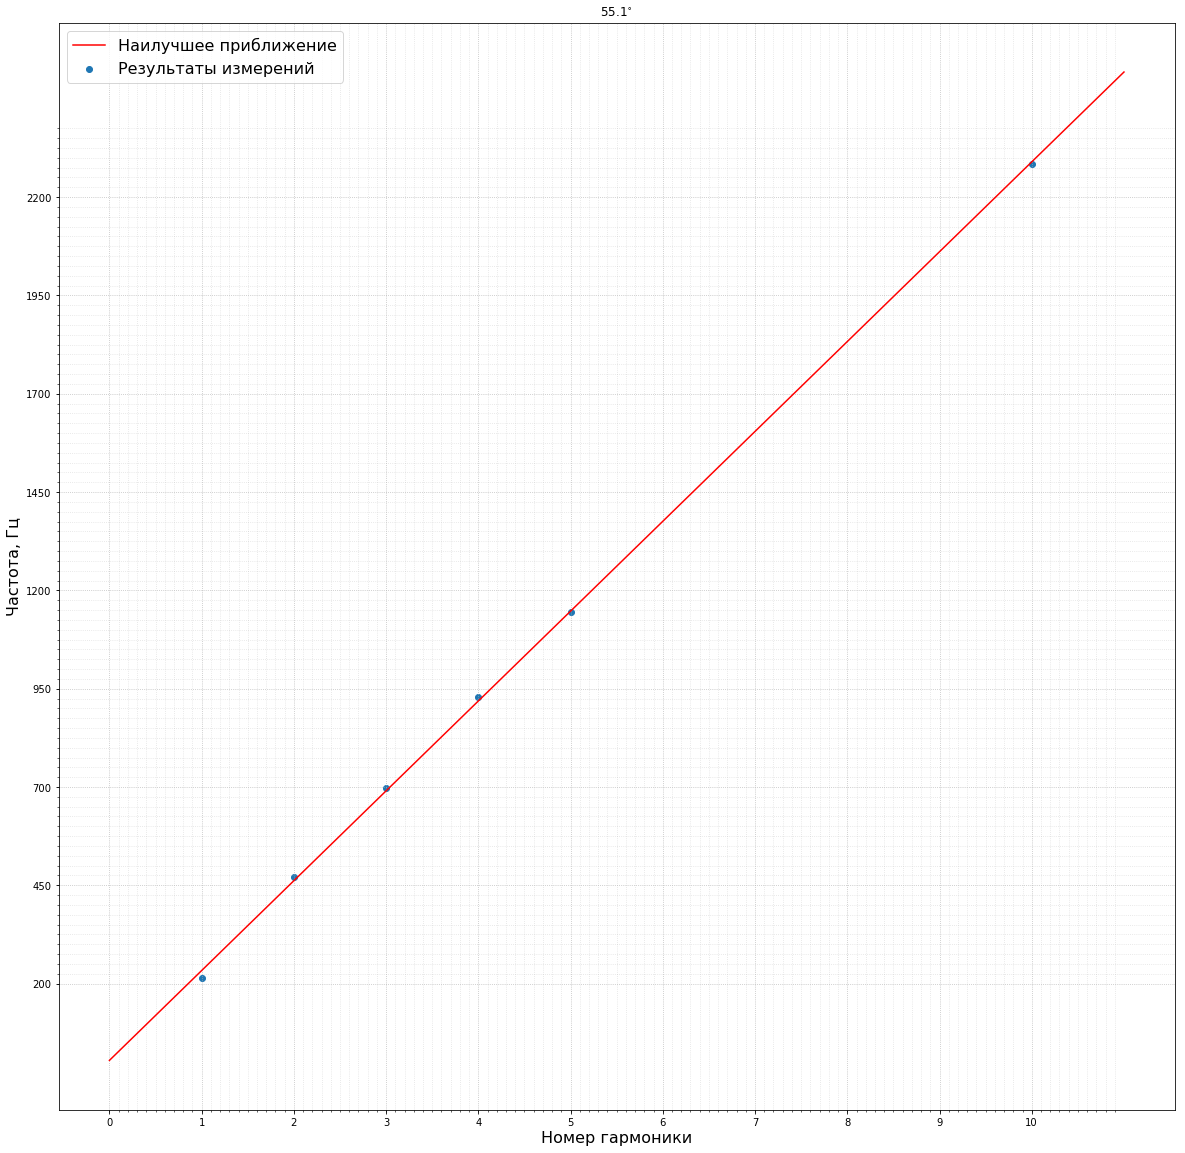

In [8]:
for i, T in enumerate(temperatures):
    harmonics_freqs = resonance_freqs[i, :]
    
    grid = np.linspace(np.min(harmonics_nums) - 1, np.max(harmonics_nums) + 1, 100)
    ax = plt.figure(figsize=(20, 20)).add_subplot(1,1,1)
    k, b = np.polyfit(harmonics_nums, harmonics_freqs, 1)
    
    plt.scatter(harmonics_nums, 
                harmonics_freqs, 
                label="Результаты измерений")

    plt.plot(grid, k * grid + b,
             label='Наилучшее приближение',
             color='red')
    
    xstep = 1
    ystep = 250
    minor_xticks = np.arange(np.min(harmonics_nums) - xstep, np.max(harmonics_nums) + xstep, xstep / 10)
    major_xticks = np.arange(np.min(harmonics_nums) - xstep, np.max(harmonics_nums) + xstep, xstep)
    min_y = np.min(harmonics_freqs) // 100 * 100
    max_y = (np.max(harmonics_freqs) + 199) // 100 * 100
    minor_yticks = np.arange(min_y, max_y, ystep / 10)
    major_yticks = np.arange(min_y, max_y, ystep)

    ax.set_xticks(major_xticks)
    ax.set_xticks(minor_xticks, minor=True)
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    ax.grid(which='minor', alpha=0.4, ls=':')
    ax.grid(which='major', alpha=0.6, ls=':')
    
    plt.title(r"{}$^{{\circ}}$".format(round(kelvin2celsium(T), 2)))
    plt.xlabel("Номер гармоники", fontsize=16)
    plt.ylabel("Частота, Гц", fontsize=16)

    plt.legend(loc='best', fontsize=16)
    plt.show()

In [9]:
all_c = []
all_c_sigma = []
all_gamma = []
all_gamma_sigma = []

for i, T in enumerate(temperatures):
    harmonics_freqs = resonance_freqs[i, :]
    
    c = round(get_v_sound(T, harmonics_freqs), 1)
    c_sigma = round(get_v_sound_sigma(T, harmonics_freqs), 3)
    gamma = round(get_gamma(T, harmonics_freqs), 2)
    gamma_sigma = round(get_gamma_sigma(T, harmonics_freqs), 3)
    
    all_c.append(c)
    all_c_sigma.append(c_sigma)
    all_gamma.append(gamma)
    all_gamma_sigma.append(gamma_sigma)

calculations = np.array([list(map(kelvin2celsium, temperatures)), 
                                     all_c, 
                                     all_c_sigma, 
                                     all_gamma, 
                                     all_gamma_sigma]).T
df_calculations = pd.DataFrame(data=calculations, 
                               columns=[r"Температура, $^{{\circ}}C$",
                                     r"Cкорость звука, $\frac{м}{c}$",
                                     r"$\sigma_{v_{зв}}$",
                                     r"$\gamma$",
                                     r"$\sigma_{\gamma}$"])
df_calculations

,"Температура, $^{{\circ}}C$","Cкорость звука, $\frac{м}{c}$",$\sigma_{v_{зв}}$,$\gamma$,$\sigma_{\gamma}$
0,22.2,347.4,1.869,1.43,0.102
1,30.2,351.8,2.217,1.42,0.102
2,40.0,357.7,2.178,1.43,0.102
3,50.0,365.8,1.974,1.44,0.103
4,55.1,365.6,2.302,1.42,0.102


In [10]:
print("Среднее gamma = {}".format(round(np.mean(calculations[:, 3]), 2)))

Среднее gamma = 1.43
